# 極限値

## 収束と発散

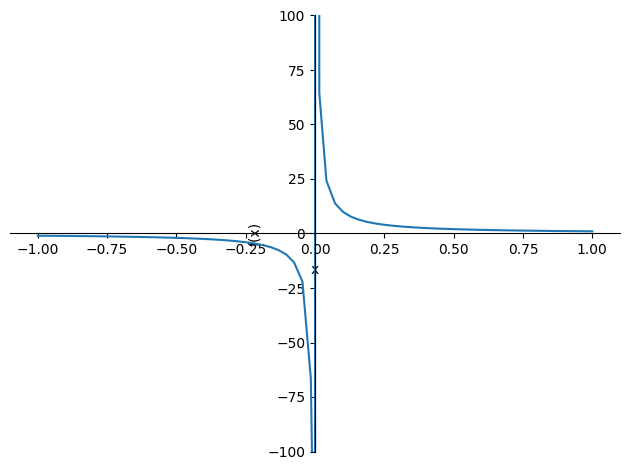

In [1]:
from sympy import init_printing, symbols
from sympy.plotting import plot
%matplotlib inline
init_printing(use_latex="mathjax")

x = symbols('x')

# 1/x のプロット。 y 軸の表示範囲はylim で設定
plot(1/x, (x, -1, 1), ylim=(-100, 100))

## SymPyを使った極限値の計算

In [2]:
from sympy import limit
# limit を使用して極限値を計算
limit(x + 1, x, 1)

2

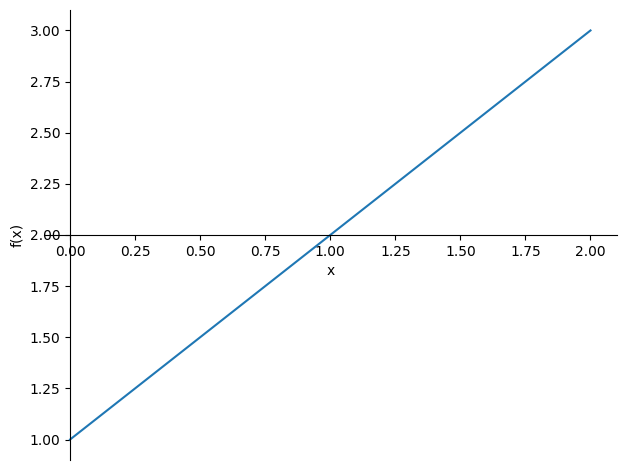

In [3]:
plot(x + 1, (x, 0, 2))

In [4]:
limit(1/x, x, 0)

∞

In [5]:
# 左極限はdir='-' で指定
limit(1/x, x, 0, dir='-')

-∞

## 関数の極限

### 不定形の極限

$$\lim_{x \to 2}\dfrac{x^2-5x+6}{x-2}$$

In [6]:
numer = x**2 - 5*x + 6 #分子
denom = x -2 #分母
f = numer / denom 
f

 2          
x  - 5⋅x + 6
────────────
   x - 2    

In [7]:
from sympy import factor
#分子を因数分解する
factor(numer) 

(x - 3)⋅(x - 2)

In [8]:
factor(numer) / denom

x - 3

In [9]:
from sympy import simplify
# simplify によって、式を簡素化できる
simplify(f) 

x - 3

In [10]:
limit((x**2 - 5*x + 6)/(x - 2), x, 2)

-1

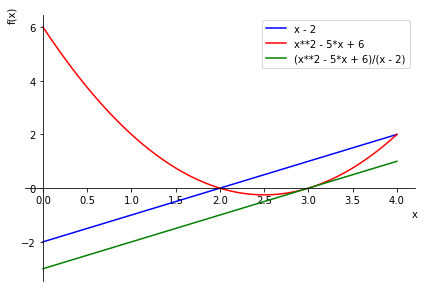

In [11]:
# x 軸のプロット範囲
x_range = [0, 4]

# 分母、分子、関数のプロット
p = plot(denom, numer, f, (x, x_range[0], x_range[1]),
        show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'

p.show()

### sin(x) / xの極限

In [11]:
from sympy import sin, pi
limit(sin(x) / x, x, 0)

1

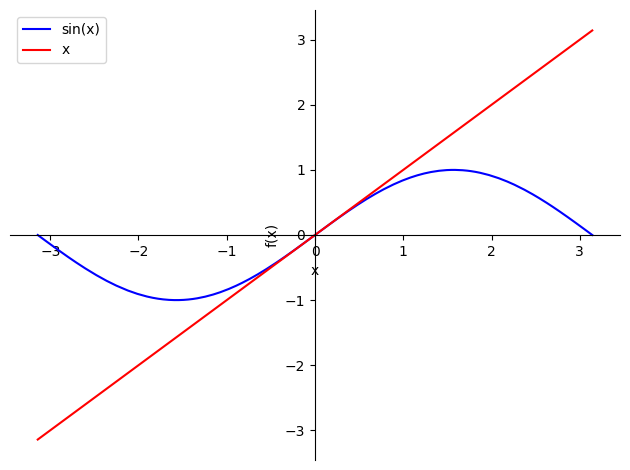

In [12]:
# x 軸のプロット範囲
x_range = [-pi, pi]

# sin(x) とx のプロット
p = plot(sin(x), x, (x, x_range[0], x_range[1]),
        show=False, legend=True)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

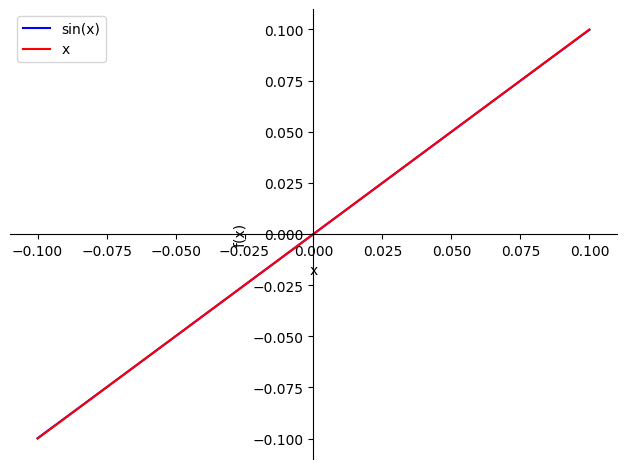

In [13]:
# x 軸のプロット範囲を原点付近に設定
x_range = [-0.1, 0.1]

# sin(x) とx のプロット
p = plot(sin(x), x, (x, x_range[0], x_range[1]),
        show=False, legend=True)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

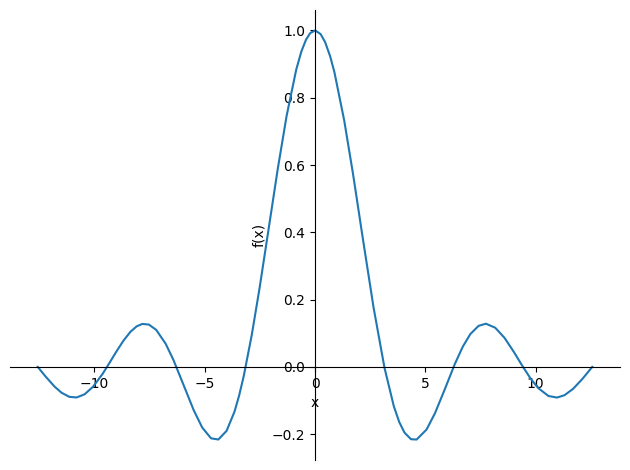

In [14]:
plot(sin(x) / x, (x, -4*pi, 4*pi))

### 自然対数の底

$$e = \lim_{n \to \infty} \left(1 + \frac{1}{n} \right )^n$$

In [15]:
# 無限のシンボルoo をインポート
from sympy import oo

# n は正の実数であるためreal=True とpositive=True を指定
n = symbols('n', real=True, poitive=True)

# e の極限値を計算
e_0 = limit((1 + 1/n)**n, n, oo)
e_0

ℯ

In [16]:
# evalf メソッドで数式を評価
e_0.evalf(6)

2.71828

In [17]:
e_0.evalf(20)

2.7182818284590452354

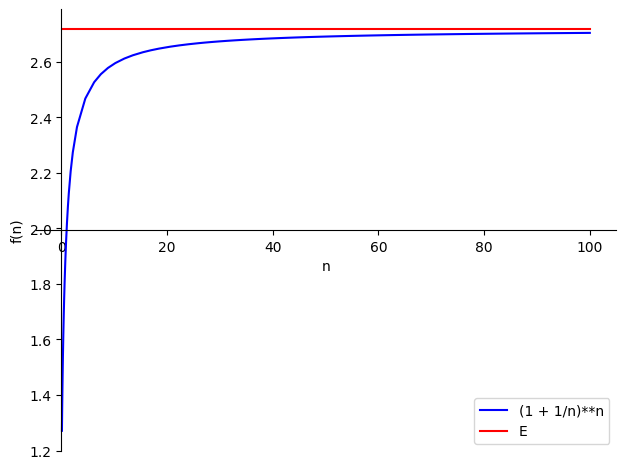

In [18]:
# 極限値がe に収束する様子をプロット
p = plot((1 + 1/n)**(n), e_0, (n, 0.1, 100),
        show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

### 円周率の計算
円周率は以下の式で求めることができることが知られています。

$$
\sum _{{n=1}}^{{\infty }}{\frac  {1}{n^{{2}}}}=\frac{1}{1^{2}}+\frac{1}{2^{2}}+\frac{1}{3^{2}}+\cdots={\frac  {\pi ^{2}}{6}}
$$

In [19]:
# 和を計算するSum をインポート
from sympy import Sum
k, n = symbols('k n')

# Sum(関数, (変数, 始点, 終点)) で和の計算のシンボルを生成
sum_pi = Sum(1/k**2, (k, 1, n))
sum_pi

  n     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   2
  ╱   k 
 ╱      
 ‾‾‾‾   
k = 1   

In [20]:
# doit メッソドで計算を実行
s_val = limit(sum_pi.doit(), n, oo)
s_val

 2
π 
──
6 

In [21]:
# 平方根sqrt をインポート
from sympy import sqrt

# 円周率を計算
sqrt(6 * s_val)

π

In [22]:
from sympy import lambdify

# lambdify(変数, 関数) を使用して数値計算可能な関数fを作る
f = lambdify(n, sqrt(6*sum_pi))

In [23]:
# n = 10 のf を計算
f(10)

3.0493616359820694

In [24]:
f(1000)

3.1406380562059946

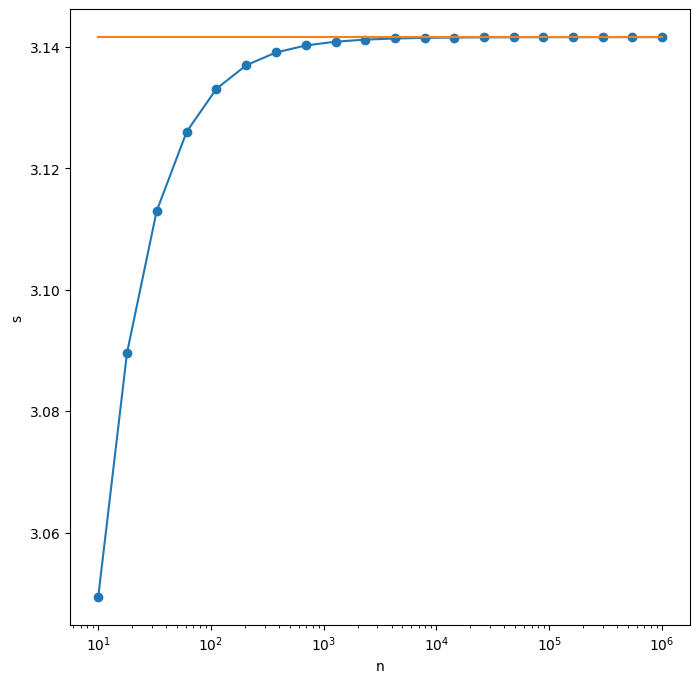

In [25]:
# NumPy を名前np でインポート
import numpy as np
# Matplotlib のpyplot を名前plt でインポート
import matplotlib.pyplot as plt

# NumPy のlogspace を使用して、対数スケールで均等になる点を作成
n_array = np.logspace(1, 6, 20, dtype='int')

# リスト内包表記を使用
sum_array = [f(n_array[i]) for i in range(len(n_array))]

# Matplotlib を使用してプロットを作成する
# プロットエリアの作成
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# f(n) の計算結果sum_array と円周率pi をプロット
ax.plot(n_array, sum_array, marker='o')
ax.plot(n_array, np.pi*np.ones(20))

# x 軸を対数スケールに設定
ax.set_xscale('log')

# 軸ラベルの設定
ax.set_xlabel('n')
ax.set_ylabel('s')

# プロットの表示
plt.show()